# List of callbacks

In [ ]:
from fastai.gen_doc.nbdoc import *
from fastai.vision import *
from fastai.text import *
from fastai.callbacks import * 
from fastai.basic_train import * 
from fastai.train import * 
from fastai import callbacks

fastai's training loop is highly extensible, with a rich *callback* system. See the [`callback`](/callback.html#callback) docs if you're interested in writing your own callback. See below for a list of callbacks that are provided with fastai, grouped by the module they're defined in.

Every callback that is passed to [`Learner`](/basic_train.html#Learner) with the `callback_fns` parameter will be automatically stored as an attribute. The attribute name is snake-cased, so for instance [`ActivationStats`](/callbacks.hooks.html#ActivationStats) will appear as `learn.activation_stats` (assuming your object is named `learn`).

## [`Callback`](/callback.html#Callback)

This sub-package contains more sophisticated callbacks that each are in their own module. They are (click the link for more details):

### [`LRFinder`](/callbacks.lr_finder.html#LRFinder)

Use Leslie Smith's [learning rate finder](https://www.jeremyjordan.me/nn-learning-rate/) to find a good learning rate for training your model. Let's see an example of use on the MNIST dataset with a simple CNN.

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)
data = ImageDataBunch.from_folder(path)
def simple_learner(): return Learner(data, simple_cnn((3,16,16,2)), metrics=[accuracy])
learn = simple_learner()

The fastai librairy already has a Learner method called [`lr_find`](/train.html#lr_find) that uses [`LRFinder`](/callbacks.lr_finder.html#LRFinder) to plot the loss as a function of the learning rate

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


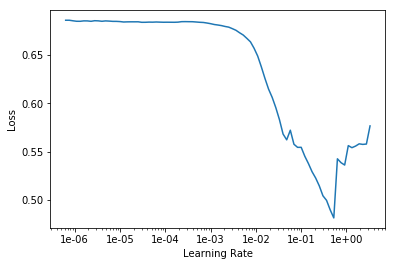

In [ ]:
learn.recorder.plot()

In this example, a learning rate around 2e-2 seems like the right fit.

In [ ]:
lr = 2e-2

### [`OneCycleScheduler`](/callbacks.one_cycle.html#OneCycleScheduler)

Train with Leslie Smith's [1cycle annealing](https://sgugger.github.io/the-1cycle-policy.html) method. Let's train our simple learner using the one cycle policy.

In [ ]:
learn.fit_one_cycle(3, lr)

epoch,train_loss,valid_loss,accuracy
1,0.111205,0.056460,0.979882
2,0.040632,0.023650,0.987733
3,0.021217,0.020044,0.991659


The learning rate and the momentum were changed during the epochs as follows (more info on the [dedicated documentation page](https://docs.fast.ai/callbacks.one_cycle.html)).

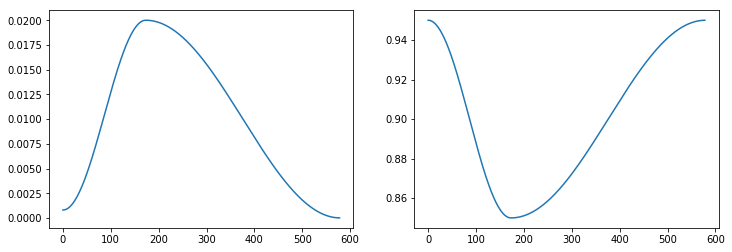

In [ ]:
learn.recorder.plot_lr(show_moms=True)

### [`MixUpCallback`](/callbacks.mixup.html#MixUpCallback)

Data augmentation using the method from [mixup: Beyond Empirical Risk Minimization](https://arxiv.org/abs/1710.09412). It is very simple to add mixup in fastai :

In [ ]:
learn = Learner(data, simple_cnn((3, 16, 16, 2)), metrics=[accuracy]).mixup()

### [`CSVLogger`](/callbacks.csv_logger.html#CSVLogger)

Log the results of training in a csv file. Simply pass the CSVLogger callback to the Learner.

In [ ]:
learn = Learner(data, simple_cnn((3, 16, 16, 2)), metrics=[accuracy, error_rate], callback_fns=[CSVLogger])

In [ ]:
learn.fit(3)

epoch,train_loss,valid_loss,accuracy,error_rate
1,0.125326,0.103473,0.963690,0.036310
2,0.077392,0.059223,0.977920,0.022080
3,0.065756,0.081031,0.969578,0.030422


You can then read the csv.

In [ ]:
learn.csv_logger.read_logged_file()

,epoch,train_loss,valid_loss,accuracy,error_rate
0,1,0.125326,0.103473,0.963690,0.036310
1,2,0.077392,0.059223,0.977920,0.022080
2,3,0.065756,0.081031,0.969578,0.030422


### [`GeneralScheduler`](/callbacks.general_sched.html#GeneralScheduler)

Create your own multi-stage annealing schemes with a convenient API. To illustrate, let's implement a 2 phase schedule.

In [ ]:
def fit_odd_shedule(learn, lr, mom):
    n = len(learn.data.train_dl)
    phases = [TrainingPhase(n, lr, mom, lr_anneal=annealing_cos), TrainingPhase(n*2, lr, mom, lr_anneal=annealing_poly(2))]
    sched = GeneralScheduler(learn, phases)
    learn.callbacks.append(sched)
    total_epochs = 3
    learn.fit(total_epochs)

In [ ]:
learn = Learner(data, simple_cnn((3,16,16,2)), metrics=accuracy)
fit_odd_shedule(learn, 1e-3, 0.9)

epoch,train_loss,valid_loss,accuracy
1,0.178648,0.161728,0.944553
2,0.142739,0.132620,0.957802
3,0.135239,0.129183,0.960255


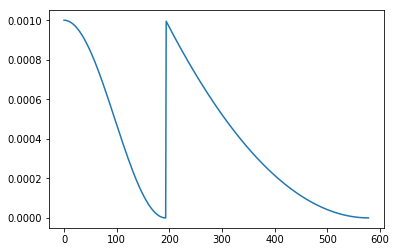

In [ ]:
learn.recorder.plot_lr()

### [`MixedPrecision`](/callbacks.fp16.html#MixedPrecision)

Use fp16 to [take advantage of tensor cores](https://docs.nvidia.com/deeplearning/sdk/mixed-precision-training/index.html) on recent NVIDIA GPUs for a 200% or more speedup.

### [`HookCallback`](/callbacks.hooks.html#HookCallback)

Convenient wrapper for registering and automatically deregistering [PyTorch hooks](https://pytorch.org/tutorials/beginner/former_torchies/nn_tutorial.html#forward-and-backward-function-hooks). Also contains pre-defined hook callback: [`ActivationStats`](/callbacks.hooks.html#ActivationStats).

### [`RNNTrainer`](/callbacks.rnn.html#RNNTrainer)

Callback taking care of all the tweaks to train an RNN.

### [`TerminateOnNaNCallback`](/callbacks.tracker.html#TerminateOnNaNCallback)

Stop training if the loss reaches NaN.

### [`EarlyStoppingCallback`](/callbacks.tracker.html#EarlyStoppingCallback)

Stop training if a given metric/validation loss doesn't improve.

### [`SaveModelCallback`](/callbacks.tracker.html#SaveModelCallback)

Save the model at every epoch, or the best model for a given metric/validation loss.

### [`ReduceLROnPlateauCallback`](/callbacks.tracker.html#ReduceLROnPlateauCallback)

Reduce the learning rate each time a given metric/validation loss doesn't improve by a certain factor.

## [`train`](/train.html#train) and [`basic_train`](/basic_train.html#basic_train)

### [`Recorder`](/basic_train.html#Recorder)

Track per-batch and per-epoch smoothed losses and metrics.

### [`ShowGraph`](/train.html#ShowGraph)

Dynamically display a learning chart during training.

### [`BnFreeze`](/train.html#BnFreeze)

Freeze batchnorm layer moving average statistics for non-trainable layers.

### [`GradientClipping`](/train.html#GradientClipping)

Clips gradient during training.